In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Hyperparameters & locations
</div>

In [2]:
locs = {'waiting_folder' : '../disney-world/data/waiting times'}

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Reading the data
</div>

In [3]:
waiting_times = list()
for attraction in tqdm(os.listdir(locs['waiting_folder'])):
    filename = os.path.join(locs['waiting_folder'], attraction)
    df = pd.read_csv(filename)
    if df.empty:
        continue
    df.insert(0, 'attraction', attraction.split('.')[0])
    waiting_times.append(df)

df_wait_raw = pd.concat(waiting_times, ignore_index=True)

100%|██████████| 52/52 [00:06<00:00,  7.70it/s]


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Cleaning the data
</div>

In [12]:
df_wait = df_wait_raw.copy()
# Cleaning the actual waiting times
# Removing outliers from actuals
df_wait = df_wait[((df_wait.SACTMIN >= -1000) & (df_wait.SACTMIN < 360)) | (df_wait.SACTMIN.isnull())]
# Removing outliers from posted (attraction closed at -999)
df_wait = df_wait[(df_wait.SPOSTMIN >= -998.99) | (df_wait.SPOSTMIN.isnull())]

df_wait['date'] = pd.to_datetime(df_wait.date, format = '%m/%d/%Y')
df_wait['datetime'] = pd.to_datetime(df_wait.datetime, format = '%Y-%m-%d %H:%M:%S')

print(f"Removed {len(df_wait_raw) - len(df_wait)} rows")

# You could split the dataset into two seperate dataframes (plusjes & minnetjes :-))
df_wait_act = df_wait[~df_wait.SACTMIN.isnull()].drop('SPOSTMIN', axis = 1)
df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)

attractions = df_wait.attraction.unique()

Removed 1318703 rows


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Visualizing the data that we have in a very simple way
</div>

In [13]:
df_wait_post.groupby('attraction')['SPOSTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,290934.0,76.962455,33.993364,0.0,50.0,70.0,95.0,300.0
alien_saucers,121772.0,29.863351,15.998896,0.0,20.0,30.0,40.0,190.0
astro_orbiter,274923.0,27.026822,13.458805,0.0,20.0,25.0,35.0,180.0
barnstormer,286649.0,19.227069,14.330115,0.0,5.0,15.0,25.0,120.0
big_thunder_mtn,274544.0,37.630817,23.339693,0.0,20.0,35.0,50.0,300.0
buzz_lightyear,296459.0,31.639333,19.493587,0.0,15.0,30.0,45.0,160.0
carousel_of_progress,36096.0,6.333389,3.586248,0.0,5.0,5.0,5.0,80.0
country_bears,10691.0,14.968665,8.613217,0.0,10.0,10.0,20.0,45.0
dinosaur,228624.0,27.399704,19.630231,0.0,10.0,20.0,40.0,300.0


In [14]:
df_wait_act.groupby('attraction')['SACTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,7634.0,36.166623,22.950125,0.0,21.0,31.0,46.00,217.0
alien_saucers,3031.0,22.068624,12.586751,0.0,13.0,21.0,30.00,79.0
astro_orbiter,1770.0,20.402260,9.501468,0.0,14.0,20.0,26.00,65.0
barnstormer,3087.0,12.528345,9.900399,0.0,5.0,11.0,18.00,70.0
big_thunder_mtn,11729.0,18.251513,12.913191,0.0,9.0,16.0,25.00,125.0
buzz_lightyear,7998.0,14.120780,12.355926,0.0,5.0,11.0,20.00,109.0
carousel_of_progress,876.0,4.179224,4.455348,0.0,1.0,2.0,6.00,33.0
country_bears,362.0,7.842541,7.213412,0.0,2.0,6.0,11.00,40.0
dinosaur,5059.0,20.197075,15.332370,0.0,8.0,17.0,29.00,96.0


In [15]:
# Create a dropdown widget for selecting attractions
attraction_dropdown = widgets.Dropdown(
    options=attractions,
    description='Attraction:',
    value=attractions[0]  # Default value
)

# Function to update the plot based on selected attraction
def update_plot(attraction):
    plt.figure(figsize=(12, 4))  # Create a new figure
    plt.subplot(1, 2, 1)  # First subplot
    df_wait_attraction = df_wait.query("attraction == @attraction")
    df_wait_attraction.SACTMIN.plot.hist(bins=30, title='Actual waiting times')
    
    plt.subplot(1, 2, 2)  # Second subplot
    df_wait_attraction.SPOSTMIN.plot.hist(bins=np.arange(-2.5, df_wait.SPOSTMIN.max() + 2.5, 10), title='Posted waiting times')
    
    plt.tight_layout()

# Link the dropdown to the update function
interactive_plot = widgets.interactive(update_plot, attraction=attraction_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Attraction:', options=('7_dwarfs_train', 'alien_saucers', 'astro_o…

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    STEP 2 : Validate the data with some visuals
</div>

(400.0, 1502.45)

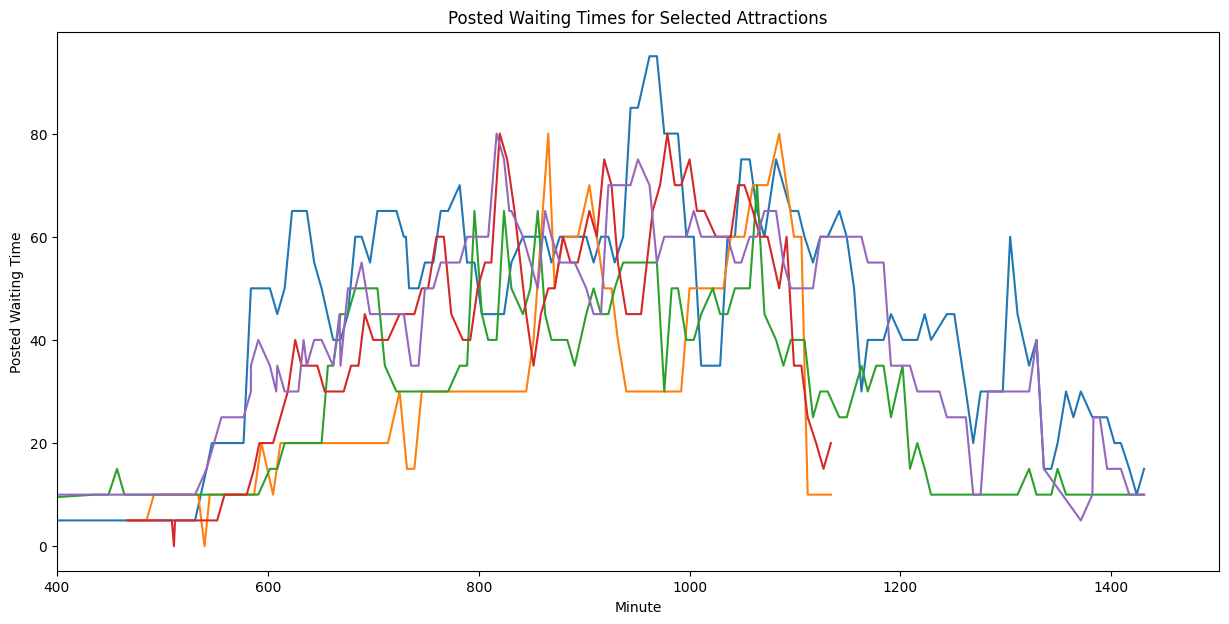

In [34]:
# Extract "minutes from df_wait" from the datetime column
df_wait_post['minute'] = df_wait_post['datetime'].dt.hour * 60 + df_wait_post['datetime'].dt.minute
date = pd.Timestamp('2015-01-01')

# Filter for specific attractions
selected_attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion']
df_selected = df_wait_post[df_wait_post['attraction'].isin(selected_attractions)]
df_selected = df_selected.sort_values(by=['minute'])

start_minute = df_selected['minute'].min()
# Find the earliest minute on the selected date
earliest_minute = df_selected[df_selected['date'] == date]['minute'].min()

# Create the plot
plt.figure(figsize=(15, 7))

#Plot each attraction's waiting times
for attraction in selected_attractions:
    attraction_data = df_selected[
        (df_selected['attraction'] == attraction) &
        (df_selected['date'] == date)
    ]
    plt.plot(
        attraction_data['minute'], 
        attraction_data['SPOSTMIN'], 
        label=attraction
    )

plt.title('Posted Waiting Times for Selected Attractions')
plt.xlabel('Minute')
plt.ylabel('Posted Waiting Time')
plt.xlim(400)

In [28]:
df_wait_post.query("attraction == 'buzz_lightyear' and date == '2015-01-01'").tail(12)

C:\Users\salia\AppData\Local\Temp\ipykernel_32688\1415552609.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_wait_post.query("attraction == 'buzz_lightyear' and date == '2015-01-01'").tail(12)


,attraction,date,datetime,SPOSTMIN,minute
1363104,buzz_lightyear,2015-01-01,2015-01-01 23:37:13,15.0,1417
1363105,buzz_lightyear,2015-01-01,2015-01-01 23:44:14,10.0,1424
1363106,buzz_lightyear,2015-01-01,2015-01-01 23:51:12,15.0,1431
1363107,buzz_lightyear,2015-01-01,2015-01-02 00:02:16,15.0,2
1363108,buzz_lightyear,2015-01-01,2015-01-02 00:09:13,10.0,9
1363109,buzz_lightyear,2015-01-01,2015-01-02 00:16:15,10.0,16
1363110,buzz_lightyear,2015-01-01,2015-01-02 00:23:12,10.0,23
1363111,buzz_lightyear,2015-01-01,2015-01-02 00:29:12,10.0,29
1363112,buzz_lightyear,2015-01-01,2015-01-02 00:37:12,5.0,37
1363113,buzz_lightyear,2015-01-01,2015-01-02 00:44:13,5.0,44


In [29]:
df_wait_post['datetime']

0          2015-01-01 07:51:12
1          2015-01-01 08:02:13
3          2015-01-01 08:09:12
4          2015-01-01 08:16:12
6          2015-01-01 08:23:12
                   ...        
10306135   2021-12-28 22:34:35
10306136   2021-12-28 22:42:15
10306137   2021-12-28 22:48:12
10306138   2021-12-28 22:54:10
10306139   2021-12-28 23:00:27
Name: datetime, Length: 8795065, dtype: datetime64[ns]

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    STEP 3 : Study for which attractions we have sufficient information for posted waiting time
</div>

Text(0.5, 1.0, 'Average data points per Date for Each Attraction')

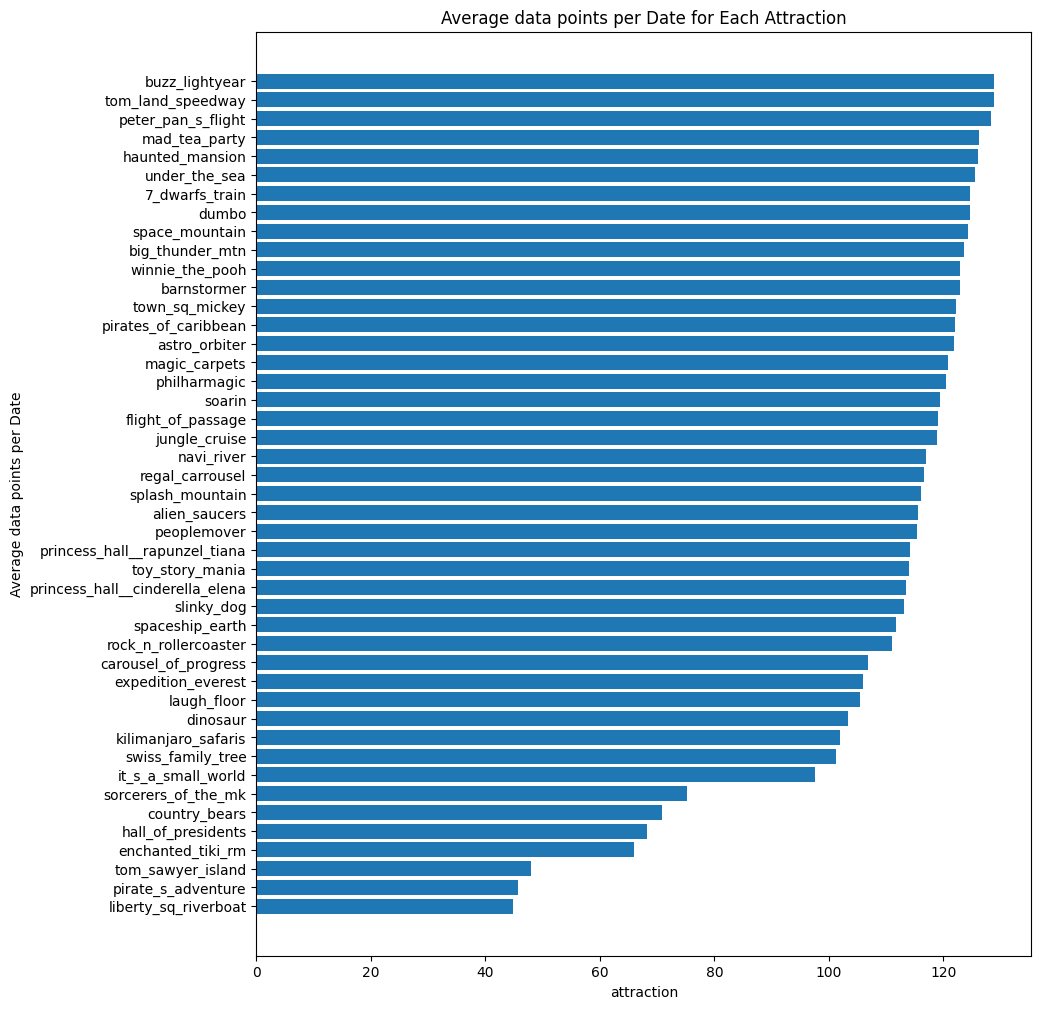

In [35]:
df_step3 = df_wait_post[df_wait_post['SPOSTMIN'].notna()]

grouped_attraction_date = df_step3.groupby(['attraction', 'date']).size().reset_index(name='count')

# Calculate the average number of rows per date for each attraction
average_counts = grouped_attraction_date.groupby('attraction')['count'].mean().reset_index(name='avg_count')
average_counts = average_counts.sort_values(by='avg_count')

df_wait_post.head(16)
plt.figure(figsize=(10, 12))
plt.barh(
    average_counts['attraction'], 
    average_counts['avg_count']
    )
# Customize the plot
plt.xlabel('attraction')
plt.ylabel('Average data points per Date')
plt.title('Average data points per Date for Each Attraction')

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    STEP 4 : Study the distribution of data availability for actual waiting time information.
</div>

In [36]:
# Group by date and count the number of actual waiting time records per day
actual_counts_per_day = df_wait_act.groupby('date').size().reset_index(name='actual_counts')
post_counts_per_day = df_wait_post.groupby('date').size().reset_index(name='actual_counts')

Text(0, 0.5, 'Number of Records')

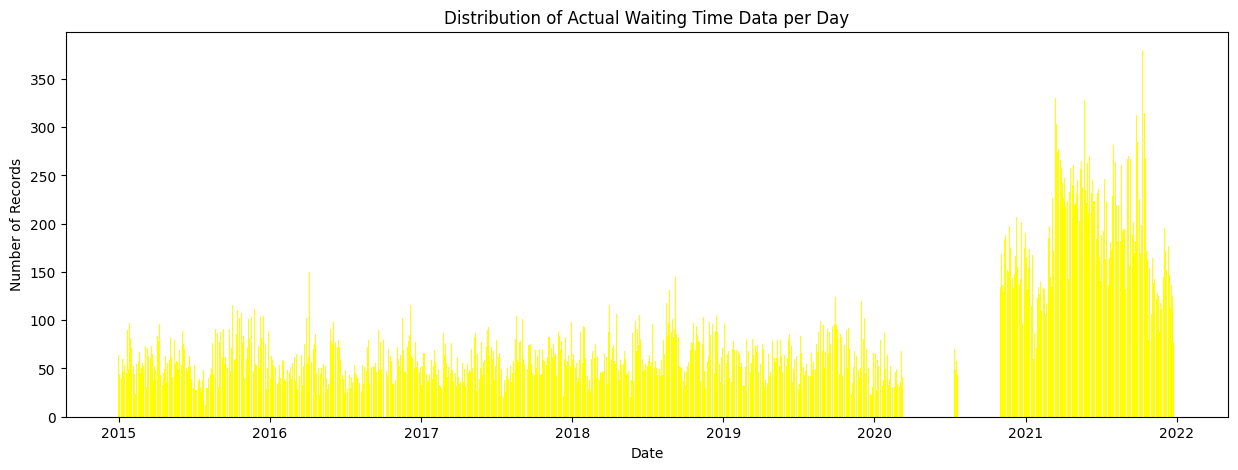

In [37]:
# Visualization 1: Distribution of data availability per day
plt.figure(figsize=(15, 5))
plt.bar(actual_counts_per_day['date'], actual_counts_per_day['actual_counts'], color='yellow')
plt.title('Distribution of Actual Waiting Time Data per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')

Text(0, 0.5, 'Number of Records')

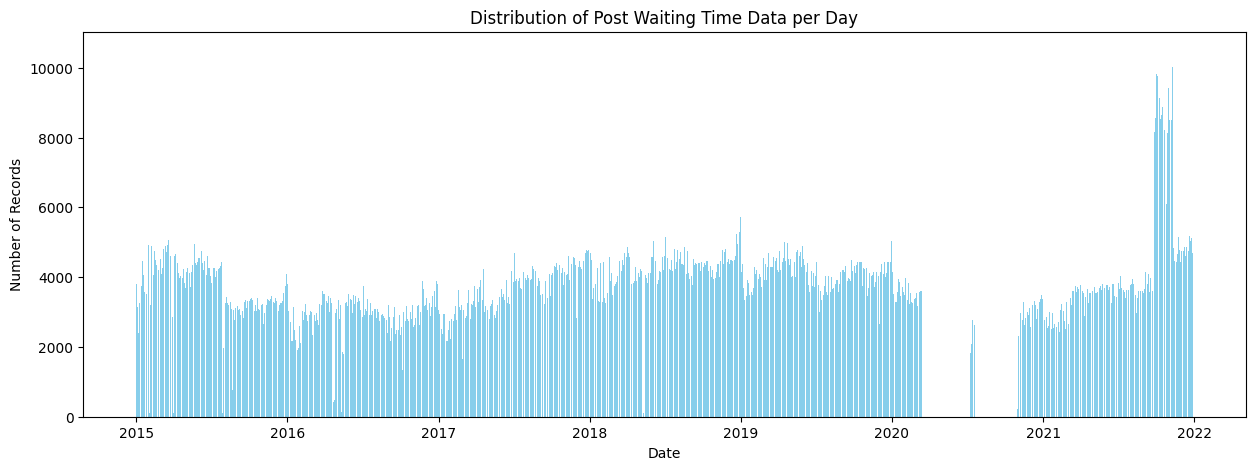

In [38]:
# Visualization 1: Distribution of data availability per day
plt.figure(figsize=(15, 5))
plt.bar(post_counts_per_day['date'], post_counts_per_day['actual_counts'], color='skyblue')
plt.title('Distribution of Post Waiting Time Data per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')

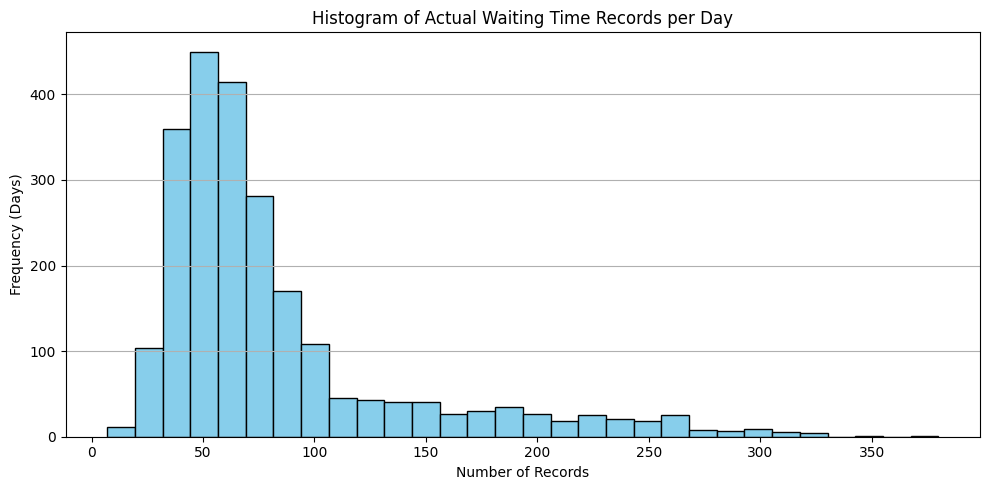

In [39]:
# Visualization 2: Histogram of the number of records per day
plt.figure(figsize=(10, 5))
plt.hist(actual_counts_per_day['actual_counts'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Actual Waiting Time Records per Day')
plt.xlabel('Number of Records')
plt.ylabel('Frequency (Days)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Actual Waiting Time (minutes)')

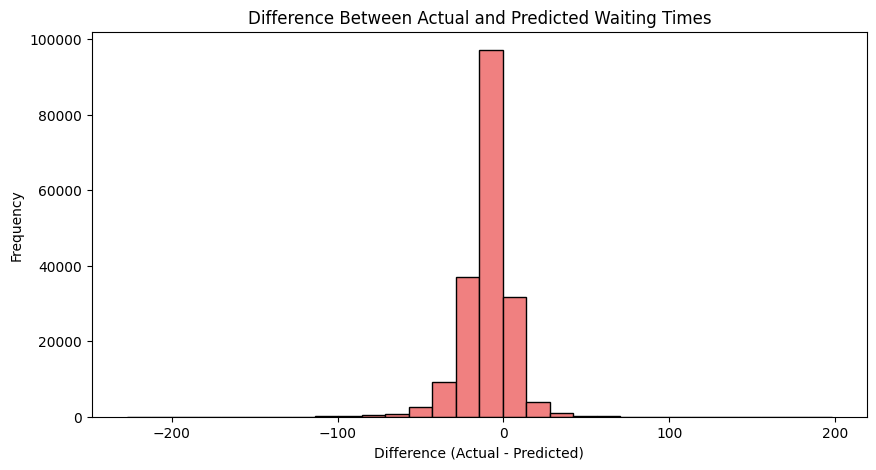

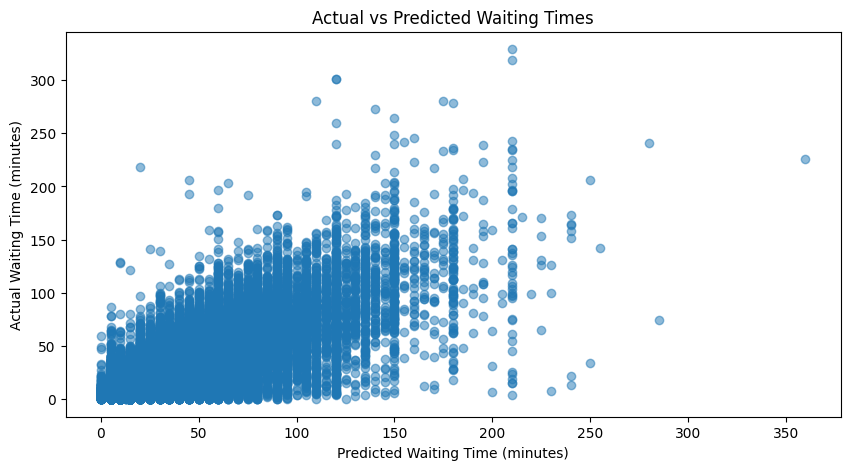

In [40]:
# Merge actual and posted times based on datetime and attraction
merged_df = pd.merge_asof(
    df_wait_act.sort_values('datetime'),
    df_wait_post.sort_values('datetime'),
    on='datetime',
    by='attraction',
    direction='nearest',
    tolerance=pd.Timedelta('10m')
)

# Calculate the difference
merged_df['difference'] = merged_df['SACTMIN'] - merged_df['SPOSTMIN']

# Visualization 1: Histogram of differences
plt.figure(figsize=(10, 5))
plt.hist(merged_df['difference'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Difference Between Actual and Predicted Waiting Times')
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')


# Visualization 2: Scatterplot of actual vs predicted times
plt.figure(figsize=(10, 5))
plt.scatter(merged_df['SPOSTMIN'], merged_df['SACTMIN'], alpha=0.5)
plt.title('Actual vs Predicted Waiting Times')
plt.xlabel('Predicted Waiting Time (minutes)')
plt.ylabel('Actual Waiting Time (minutes)')


In [63]:
# Group by day of week and holiday indicator
avg_waits_day_holiday = df_selected.groupby(['date', 'HOLIDAYM'])['SPOSTMIN'].mean().reset_index()

# Visualization: Combination of day of week and holiday
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='SPOSTMIN', hue='HOLIDAYM', data=avg_waits_day_holiday, palette='viridis')
plt.title('Average Posted Waiting Time per Day of the Week Considering Holiday (Rides)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Posted Waiting Time (minutes)')
plt.legend(title='Holiday (1 = Yes, 0 = No)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


KeyError: 'HOLIDAYM'

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Team 1 - sessie 1
</div>

<Axes: xlabel='attraction'>

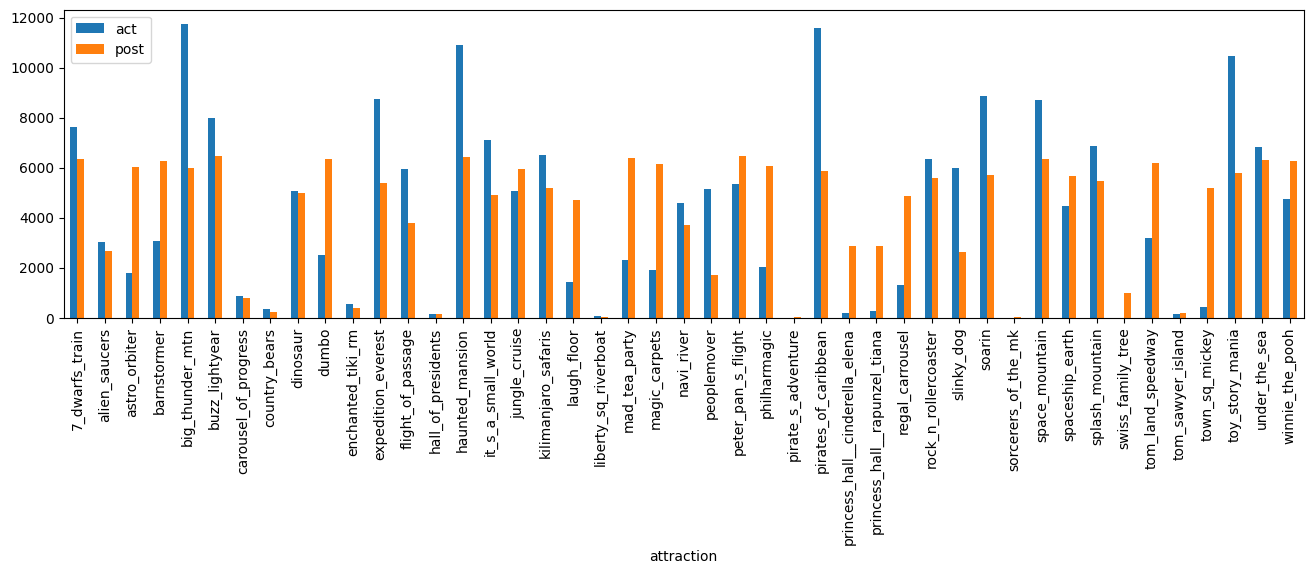

In [17]:
fig, ax = plt.subplots(figsize = (16, 4))
pd.DataFrame({'act' : df_wait_act.groupby('attraction')['SACTMIN'].describe()['count'],
                    'post' : df_wait_post.groupby('attraction')['SPOSTMIN'].describe()['count'] * len(df_wait_act) / len(df_wait_post) }).plot.bar(ax = ax)

In [18]:
pd.DataFrame({'act' : df_wait_act.groupby('attraction')['SACTMIN'].describe()['count'],
                    'post' : df_wait_post.groupby('attraction')['SPOSTMIN'].describe()['count'] * len(df_wait_act) / len(df_wait_post) })

,act,post
attraction,,
7_dwarfs_train,7634.0,6363.518115
alien_saucers,3031.0,2663.484941
astro_orbiter,1770.0,6013.313984
barnstormer,3087.0,6269.793507
big_thunder_mtn,11729.0,6005.024223
buzz_lightyear,7998.0,6484.364896
carousel_of_progress,876.0,789.517725
country_bears,362.0,233.841257
dinosaur,5059.0,5000.628890


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Team 3 - sessie 1
</div>

In [19]:
# Extract "minutes from df_wait" from the datetime column
df_wait_post['minute'] = df_wait_post['datetime'].dt.hour * 60 + df_wait_post['datetime'].dt.minute

In [20]:
df_wait_post

,attraction,date,datetime,SPOSTMIN,minute
0,7_dwarfs_train,2015-01-01,2015-01-01 07:51:12,45.0,471
1,7_dwarfs_train,2015-01-01,2015-01-01 08:02:13,60.0,482
3,7_dwarfs_train,2015-01-01,2015-01-01 08:09:12,60.0,489
4,7_dwarfs_train,2015-01-01,2015-01-01 08:16:12,60.0,496
6,7_dwarfs_train,2015-01-01,2015-01-01 08:23:12,60.0,503
...,...,...,...,...,...
10306135,winnie_the_pooh,2021-12-28,2021-12-28 22:34:35,5.0,1354
10306136,winnie_the_pooh,2021-12-28,2021-12-28 22:42:15,5.0,1362
10306137,winnie_the_pooh,2021-12-28,2021-12-28 22:48:12,5.0,1368
10306138,winnie_the_pooh,2021-12-28,2021-12-28 22:54:10,5.0,1374


C:\Users\salia\AppData\Local\Temp\ipykernel_32688\3255117258.py:25: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  attraction_data = df_selected[df_selected['attraction'] == 'buzz_lightyear'].query("date == @date").sort_values(by = 'minute')


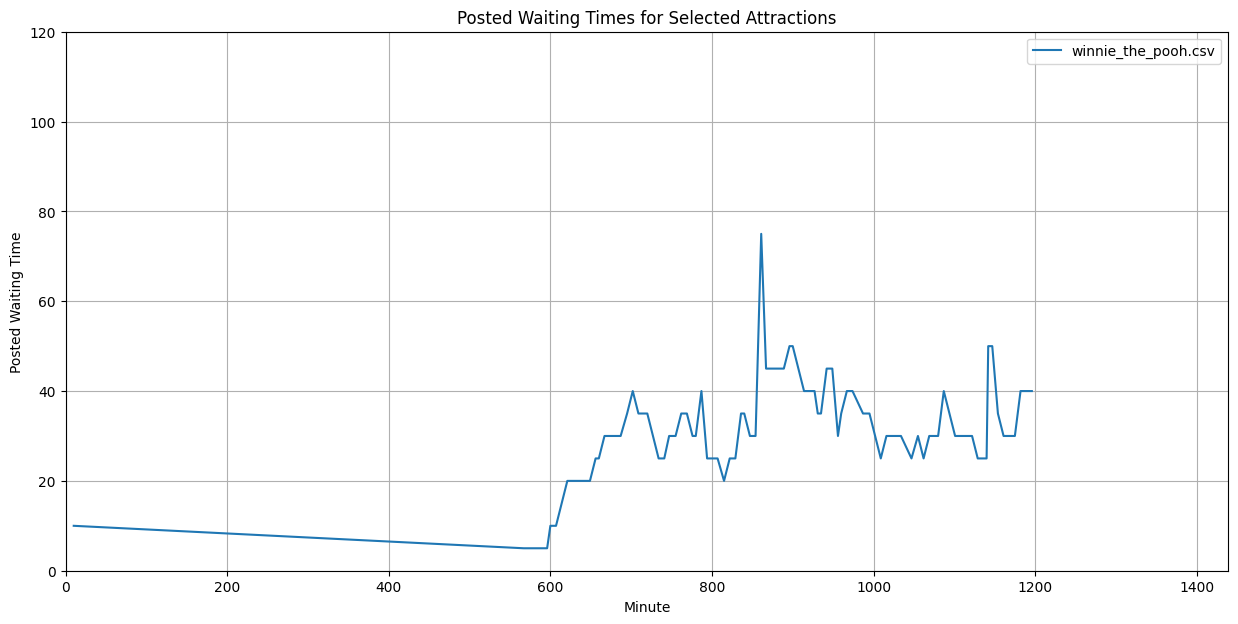

In [21]:
# Filter for specific attractions
selected_attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion', '7_dwarfs_train']
df_selected = df_wait_post[df_wait_post['attraction'].isin(selected_attractions)]
df_selected.head(10)
avg_waits = (
    df_selected
    .groupby(['attraction', 'minute'])
    .agg({'SPOSTMIN': 'mean'})
    .reset_index()
)

# Create the plot
plt.figure(figsize=(15, 7))

#Plot each attraction's waiting times
# for attraction in selected_attractions:
#     attraction_data = df_selected[df_selected['attraction'] == attraction]
#     plt.plot(
#         attraction_data['minute'], 
#         attraction_data['SPOSTMIN'], 
#         label=attraction
#     )

date = '08/01/2015'
attraction_data = df_selected[df_selected['attraction'] == 'buzz_lightyear'].query("date == @date").sort_values(by = 'minute')
plt.plot(
    attraction_data['minute'], 
    attraction_data['SPOSTMIN'], 
    label=attraction
)

plt.title('Posted Waiting Times for Selected Attractions')
plt.xlabel('Minute')
plt.ylabel('Posted Waiting Time')
plt.yticks(range(0, int(avg_waits['SPOSTMIN'].max()) + 20, 20))
plt.xlim(0, avg_waits['minute'].max())
plt.legend()
plt.grid(True)
plt.show()

In [22]:
df.date.iloc[0]

'01/01/2015'

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 1: Isabel, druktekalender van de geschiedenis
    Thing 1: Isabel, printing calendar of history
</div>

1. Restringeer tot "interessante attracties".
2. De data interpoleren/voorspellen op elke dag van de dataset voor alle interessante attracties op een gemeenschappelijke x-as, bvb elke 30 minuten. Hier enkel projected.
3. Group dag & bereken de gemiddelde wachttijd. Hier enkel projected.
4. Plaats dit in een overzichtje. Hier enkel projected.
5. One step beyond: vertaal projected waiting times naar actual met een correctiefactor of fancier (hoe bereken je die correctiefator?) Of ook: naar de toekomst
-------
1. Restring to "interesting attractions".
2. Interpolate/predict the data on each day of the dataset for all interesting attractions on a common x-axis, e.g. every 30 minutes. Here only projected.
3. Group day & calculate average wait time. Here only projected.
4. Place this in a summary. Here only projected.
5. One step beyond: translate projected waiting times to actual with a correction factor or fancier (how do you calculate that correction factor?) Or also: to the future

In [76]:
# 1- Restrict to "Interesting Attractions"
# interesting = most visited + fewest nulls in SACTMIN + avarage acatual wait time 

# Count how many actual wait time records there are for each attraction
attraction_counts = df_wait_act['attraction'].value_counts().reset_index()
attraction_counts.columns = ['attraction', 'count']

attraction_counts['attraction'].tolist()

['big_thunder_mtn',
 'pirates_of_caribbean',
 'haunted_mansion',
 'toy_story_mania',
 'soarin',
 'expedition_everest',
 'space_mountain',
 'buzz_lightyear',
 '7_dwarfs_train',
 'it_s_a_small_world',
 'splash_mountain',
 'under_the_sea',
 'kilimanjaro_safaris',
 'rock_n_rollercoaster',
 'slinky_dog',
 'flight_of_passage',
 'peter_pan_s_flight',
 'peoplemover',
 'dinosaur',
 'jungle_cruise',
 'winnie_the_pooh',
 'navi_river',
 'spaceship_earth',
 'tom_land_speedway',
 'barnstormer',
 'alien_saucers',
 'dumbo',
 'mad_tea_party',
 'philharmagic',
 'magic_carpets',
 'astro_orbiter',
 'laugh_floor',
 'regal_carrousel',
 'carousel_of_progress',
 'enchanted_tiki_rm',
 'town_sq_mickey',
 'country_bears',
 'princess_hall__rapunzel_tiana',
 'princess_hall__cinderella_elena',
 'tom_sawyer_island',
 'hall_of_presidents',
 'liberty_sq_riverboat',
 'sorcerers_of_the_mk']

In [59]:
# Sorted list of all interesting attractions (from most to least data)
interesting_attractions = attraction_counts['attraction'].tolist()

In [74]:
df_interesting = df_wait[df_wait['attraction'].isin(interesting_attractions)]

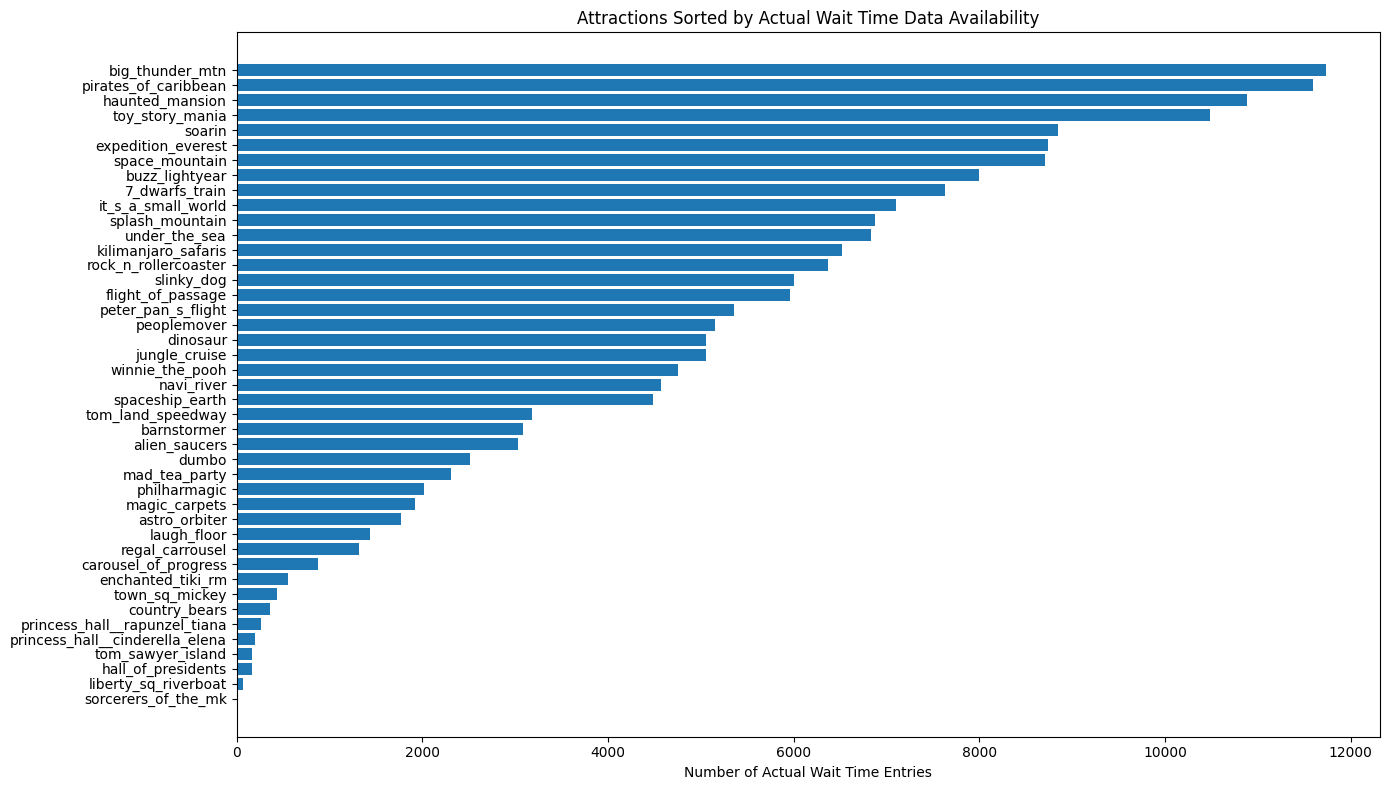

In [61]:
# Plotting
plt.figure(figsize=(14, 8))
plt.barh(attraction_counts['attraction'][::-1], attraction_counts['count'][::-1])
plt.xlabel("Number of Actual Wait Time Entries")
plt.title("Attractions Sorted by Actual Wait Time Data Availability")
plt.tight_layout()
plt.show()

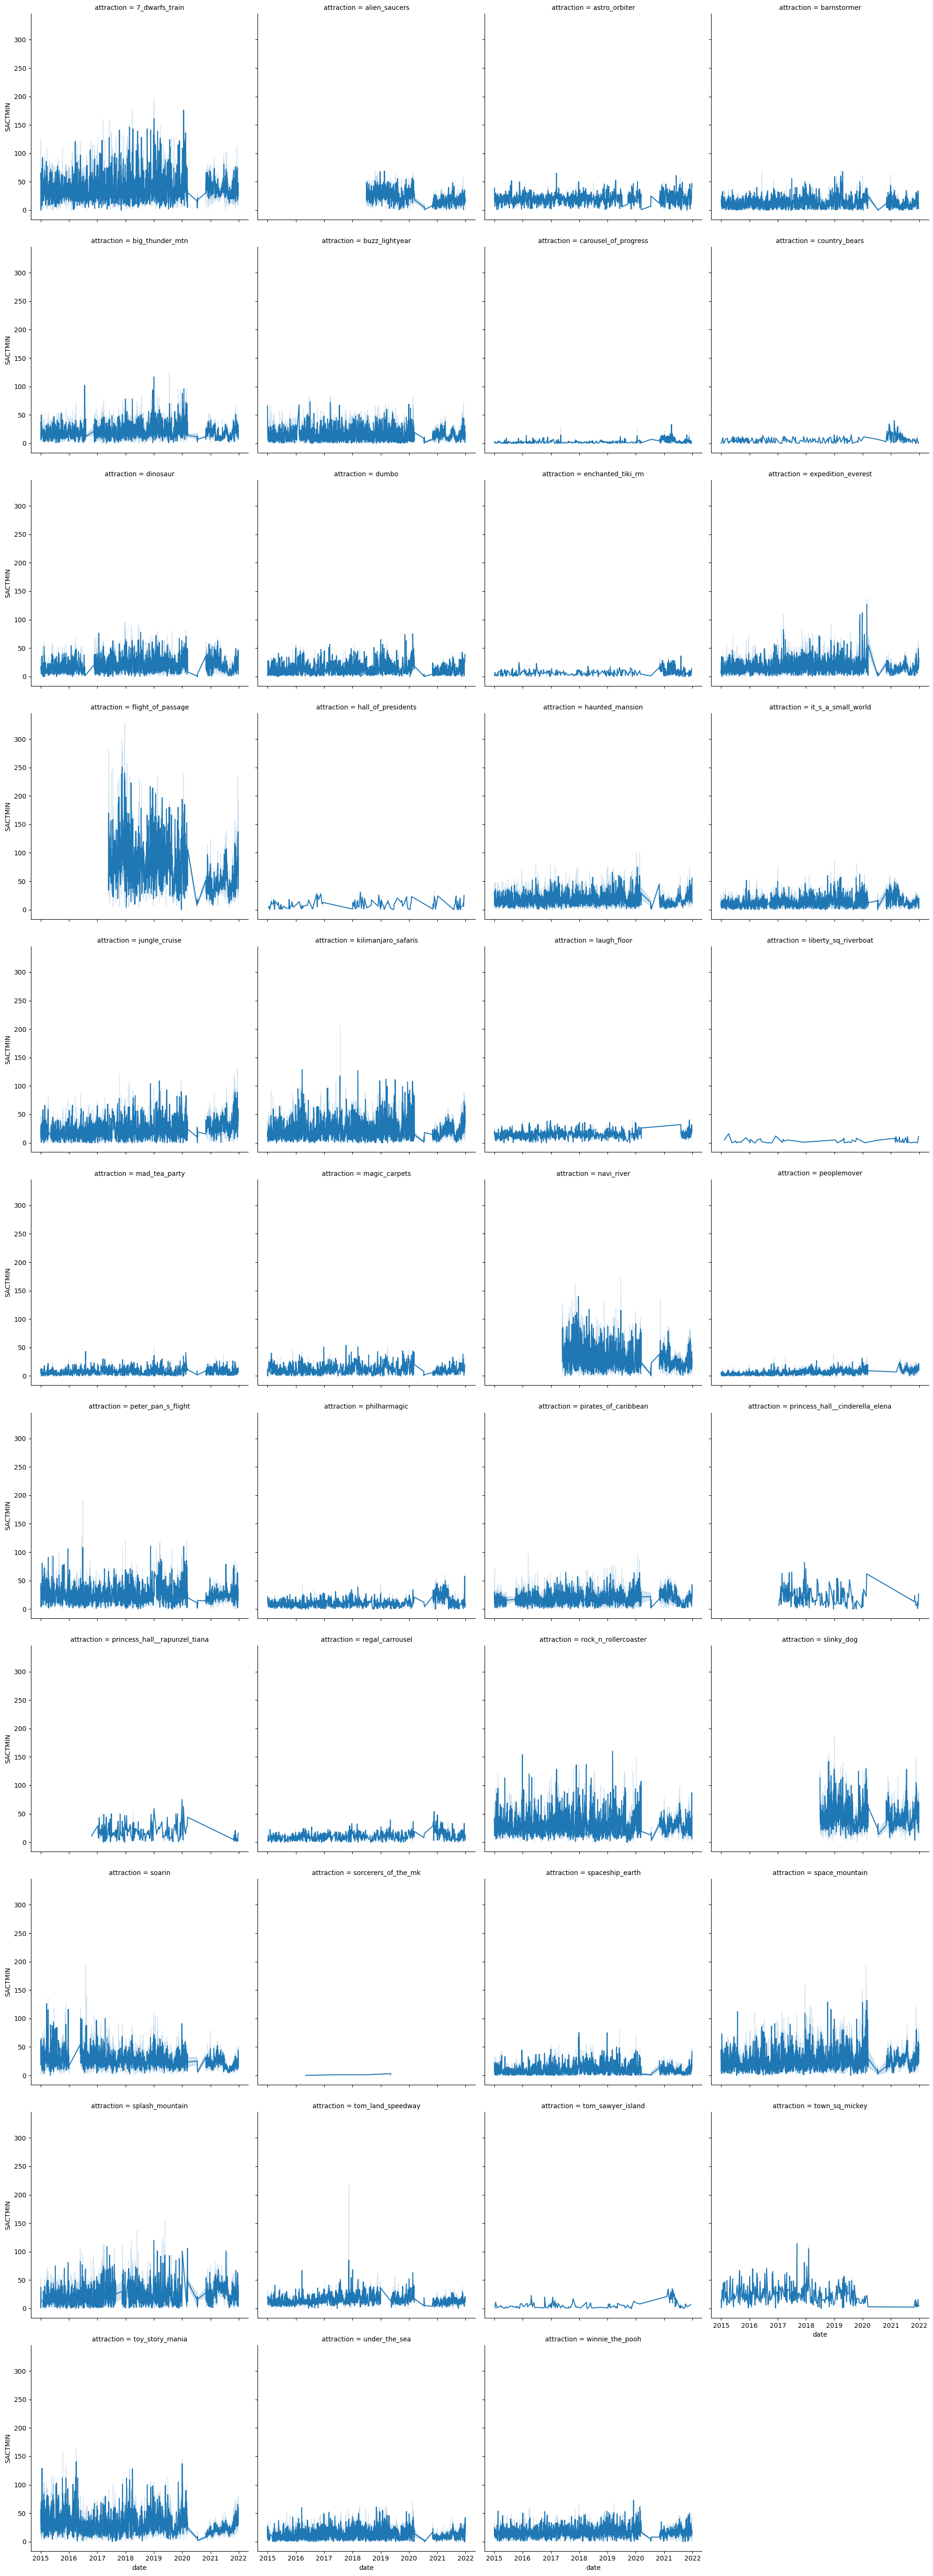

In [70]:
# create a heatmap calender per attraction 
# will show the average wait time per day/week?

import seaborn as sns

sns.relplot(data=df_wait_act, x='date', y='SACTMIN', kind='line', col='attraction', col_wrap=4)



In [77]:
# 2. Interpolate/predict



In [75]:
# 3. Group day & calculate average wait time
# need to check that days has the most incomers/visitors also need to check the weekend and holidays 
# df_projected creat the df projected
avg_per_day = df_projected.groupby(['date'])['SPOSTMIN'].mean().reset_index()


NameError: name 'df_projected' is not defined

In [ ]:
# 4. Summary

In [78]:
# 5. correction factor = SACTMIN / SPOSTMIN
# 


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 2: Peter, Dagschema voor bezoekers
    Thing 2: Peter, Day schedule for visitors
</div>

1. Restringeer tot "interessante attracties".
2. De data interpoleren/voorspellen op elke dag van de dataset voor alle interessante attracties op een gemeenschappelijke x-as, bvb elke 30 minuten. Hier enkel projected.
3. Kies een specifieke dag en veronderstel (of input) een aankomstuur
4. Maak een itinerary voor deze persoon met greedy approach: telkens de attractie met kleinste wachttijd

Interessanter maken:
- Elke attractie maar `n` keer (bvb `n =1`).
- Preferences (type attracties die je leuk vindt, attracties die je zeker gedaan wil hebben)
- Niet enkel historisch maar ook naar de toekomst.
- Niet enkel greedy maar echte discrete optimalizatie
- (benaderende) wandeltijden
- Fast pass optimalizatie 

1. Restring to "interesting attractions".
2. Interpolate/predict the data on each day of the dataset for all interesting attractions on a common x-axis, e.g. every 30 minutes. Here only projected.
3. Choose a specific day and assume (or input) an arrival time
4. Create an itinerary for this person with greedy approach: always the attraction with smallest waiting time

Make it more interesting:
- Each attraction only `n` times (e.g. `n =1`).
- Preferences (type of attractions you like, attractions you definitely want to have done)
- Not only historical but also to the future.
- Not just greedy but real discrete optimization
- (approximate) walking times
- Fast pass optimization

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 3: Lore, Posted waiting times verbeteren
    Ding 3: Lore, Posted waiting times improve
</div>

1. Analyze van de accuracy van de huidige posted waiting times (zie eerste opdracht).
2. Nieuwe posted waiting times maken op basis van de oude, heel simpel: schalingfactor toevoegen met gemiddelde ratio actual vs posted. More difficult: modelletje maken dat posted waiting time en wat tijdsinfo neem en actual uitspeekt

1. Analyze the accuracy of the current posted waiting times (see first assignment).
2. Create new posted waiting times based on the old ones, very simple: add scaling factor with average ratio actual vs posted. More difficult: create a model that breaks down posted waiting time and some time info take and actual

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 4: Stijn, slagen die actuals wel op iets !?
    Thing 4: Stijn, do those actuals succeed on anything !

</div>

Grondige data analyze van de actuals. Ihb zoeken naar outliers voor punten die eventueel totaal verkeerd liggen (maar wat zijn outliers hier?)
Thorough data analysis of actuals. Ihb look for outliers for points that may be totally wrong (but what are outliers here?)

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 5: Masha, Zijn er genoeg attracties met magic hours, of zijn de magic hours attracties over-populated op de uren dat ze "alleen" open zijn?
    
    Thing 5: Masha, Are there enough attractions with magic hours, or are the magic hours attractions over-populated at the hours they are "only" open?
</div>


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 6: Tim, Naar pretpark gaan dag voorstellen
    Thing 6: Tim, Going to amusement park day proposals
</div>

1. De rustigste dag?
2. Gerestringeerd tot bepaalde voorwaarden mbt dagen
3. Met preferenties van mezelf

1. The quietest day?
2. Restricted to certain conditions regarding days
3. With preferences of myself

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 7: Wim, stomme attractie barometer
    Thing 7: Wim, stupid attraction barometer
</div>

Zijn er attracties niet meer voldoende attractief
Are there attractions no longer sufficiently attractive

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 8: Wim 2, leuke attractie barometer
</div>

Zijn er attracties te attractief & moeten we er zo nieuwe maken van dezelfde soort? Gerelateerd: welk type attracties moeten we evt bijmaken?

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 9: Stijn, Interarrival time between 2 rides
</div>

Ook iets melden over de tijd tussen 2 karretjes of dit meenemen in je predictie?

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Ding 10: Stijn, correcte prijs fastpass
</div>

###Als DIsney world: prijszetting, als klant: keuze om al dan niet een fastpass te kopen (is it worth it, Hermiony) It's not worth it Hermiony!

###As DIsney world: pricing, as a customer: choice whether or not to buy a fastpass (is it worth it, Hermiony) It's not worth it Hermiony!

In [23]:
import datetime

In [24]:
attraction = '7_dwarfs_train'

# Stap 1: alles met minder dan 32 datapunten gooi ik eruit
df_wait_post_attr = df_wait_post.query("attraction == @attraction").copy()
lower_bound_enough = 2 * 16
dates_with_data = df_wait_post_attr.groupby('date').size()[(df_wait_post_attr.groupby('date').size() > lower_bound_enough)].index
df_wait_post_attr = df_wait_post_attr.query("date in @dates_with_data")
df_wait_post_attr.groupby('date').size().min()

np.int64(37)

In [25]:
from tqdm import tqdm
groups = list()
for date, group in tqdm(list(df_wait_post_attr.groupby('date'))):
    time_shifted = group.datetime - datetime.timedelta(hours = 3)
    group['minute'] = 3 * 60 + time_shifted.dt.hour * 60 + time_shifted.dt.minute

    # Average out duplicate minutes
    group = group.drop(['datetime', 'attraction', 'date'], axis = 1).groupby(['minute'])['SPOSTMIN'].mean().reset_index()

    new_index = np.arange(0, 27 * 60 + 1, 30)  # Range from 0 to 1620 with a step of 30

    # Step 2: Reindex the DataFrame
    # Set the 'minute' column as the index
    group = group.set_index('minute')

    # Step 3: Reindex to the new index and interpolate
    resampled = group.reindex(np.unique(np.concatenate([new_index, group.index]))).interpolate(method='linear')
    resampled = resampled.loc[new_index]

    # Step 4: Add zeros at the endpoints
    #resampled.loc[0] = 0  # Set the first value to zero
    #resampled.loc[1620] = 0  # Set the last value to zero

    # Step 5: Reset index if needed
    resampled = resampled.reset_index()

    resampled['SPOSTMIN'] = resampled['SPOSTMIN'].fillna(0)
    resampled['SPOSTMIN'] = (resampled['SPOSTMIN'] + 2.5) // 5 * 5
    resampled.insert(0, 'date', date)
    resampled.insert(0, 'attraction', attraction)
    groups.append(resampled)

100%|██████████| 2308/2308 [00:06<00:00, 381.16it/s]


In [26]:
df_netjes = pd.concat(groups, ignore_index=True)

C:\Users\salia\AppData\Local\Temp\ipykernel_32688\2552827890.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_netjes.query("date == '2017-07-12'").plot(x = 'minute', y = 'SPOSTMIN', marker = 'o')


<Axes: xlabel='minute'>

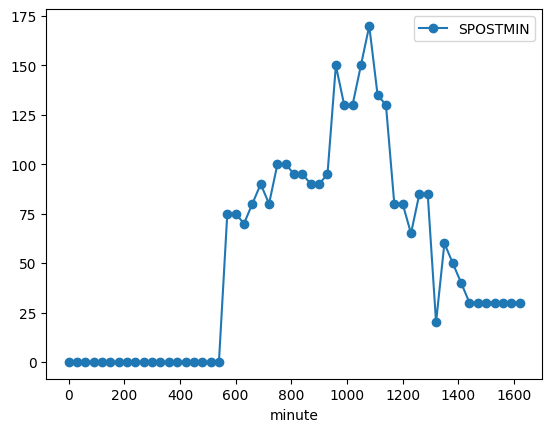

In [27]:
df_netjes.query("date == '2017-07-12'").plot(x = 'minute', y = 'SPOSTMIN', marker = 'o')